# MILESTONE 2

`File name:` milestone2.py

`Authors:`
- Víctor González
- Alvaro Bautista 
- Alicia Soria 
- Kamil Czerniak

`Date created:` 05/11/2021

`Date last modified:` 12/11/2021

`Python Version:` 3.9.2


---

## Table of contents

**1. INTRODUCTION**
   * Context
   * Project idea
   * Project goals
   * Motivation
   * Feasibility
   
   
   
**2. THE DATA**
   * Quotebank
   * External data
    
    
    
**3. PIPELINE**
   * Load data
   * Examine our data
   * Clean up data
   * Modeling
   * Interpreting
   * Storytelling and communication
    
    
    
**4. CONCLUSIONS**
   * Summary
   * Results
   * Problems encountered
    
    
    
**5. FUTURE LINES**

---

# 1. Introduction

### 1.1. Context

# Brief introduction
Welcome Milestone 2 Python notebook.
In this notebook we will answer several research questions surrounding the Breixit event.
We will employ the Quotebank dataset mainly, as well as additional databases to enrich the data and obtain more
complete conclusions.

### 1.2. Project idea


# Explain in clear, reasonable, and thorough way the project idea
Pinpoint and determine the arguments for and against Breixit in different social groups

### 1.3. Project goals

# Clear project goals

### 1.4. Motivation


In [1]:
# What story do we want to tell, why?
# Critical awareness of the project (social, cultural, political, economic, education. ... impact)

### 1.5. Feasibility

In [2]:
# Justify feasibility given the data

---

# 2. The data

## 2.1. Quotebank

This data source is described best by its makers:

>Quotebank is a dataset of 178 million unique, speaker-attributed quotations that were extracted from 196 million English news articles crawled from over 377 thousand web domains between August 2008 and April 2020. The quotations were extracted and attributed using Quobert, a distantly and minimally supervised end-to-end, language-agnostic framework for quotation attribution.

(*Vaucher, Timoté, Spitz, Andreas, Catasta, Michele, & West, Robert. (2021). Quotebank: A Corpus of Quotations from a Decade of News (1.0) [Data set]. Zenodo. https://doi.org/10.5281/zenodo.4277311 (accessible on November 10, 2021)*)

In our case, we will use data collected between January 2015 and April 2020. We decided to put the start date in 2015, as this was the year of General Election in the United Kingdom, where the Conservative Party (which won the majority in the House of Commons) has put a promise of an in-out referendum in its manifesto:

>We will negotiate new rules with the EU, so that people will have to be earning here for a number of years before they can claim benefits, including the tax credits that top up low wages. Instead of something-fornothing, we will build a system based on the principle of something-for-something. We will then put these changes to the British people in a straight in-out referendum on our membership of the European Union by the end of 2017.

(*The Conservative Party Manifesto 2015, http://ucrel.lancs.ac.uk/wmatrix/ukmanifestos2015/localpdf/Conservatives.pdf (accessible on November 10, 2021)*)

The data source is based on this paper: Timoté Vaucher, Andreas Spitz, Michele Catasta, and Robert West

"Quotebank: A Corpus of Quotations from a Decade of News"

Proceedings of the 14th International ACM Conference on Web Search and Data Mining (WSDM), 2021.

*https://doi.org/10.1145/3437963.3441760*

## Description of the data
- `quoteID:` Primary key of the quotation (format: "YYYY-MM-DD-{increasing int:06d}")
- `quotation:` Text of the longest encountered original form of the quotation
- `date:` Earliest occurrence date of any version of the quotation
- `phase:` Corresponding phase of the data in which the quotation first occurred (A-E)
- `probas:` Array representing the probabilities of each speaker having uttered the quotation. The probabilities across different occurrences of the same quotation are summed for each distinct candidate speaker and then normalized
 - `proba:` Probability for a given speaker
 - `speaker:` Most frequent surface form for a given speaker in the articles where the quotation occurred
- `speaker:` Selected most likely speaker. This matches the the first speaker entry in `probas`
- `qids:` Wikidata IDs of all aliases that match the selected speaker
- `numOccurrences:` Number of time this quotation occurs in the articles
- `urls:` List of links to the original articles containing the quotation 

### 2.2. External data

In order to get more context behind the speakers, we opted to use Wikidata dataset. This dataset, meant primarily for use in Wikimedia projects like Wikipedia or Wiktionary, contains properties and references describing an item, e.g., a person or a country. Because Quotebank uses Wikidata QIDs to refer to speakers, we can easily link persons to their attributes in Wikidata. 

Wikidata entries can contain an infinite number of attributes and references, so we have decided to use only a small number of attributes, which we can then use for demographic analysis. These attributes are:
- gender
- date of birth
- nationality
- occupation
- political party
- academic degree
- what political offices a person candidated for
- religion

All of these attributes are capable of containing multiple values (e.g., the entry for Angela Merkel marks her nationality as German and East German). 

This dataset, in its entirety, may have a size of about 100 GB, which is why we decided to use a subset provided by the course (named *speaker_attributes.parquet*). This subset contains these attributes (and a couple more that we opted not to use) for all speakers featured in Quotebank. In addition, we were provided with labels of all Wikidata entries used in the mentioned subset (*wikidata_labels_descriptions_quotebank.csv.bz2*), in order to dereference non-speaker attributes (like gender) more easily. 

#### References
- Wikidata website: https://www.wikidata.org/wiki/Wikidata:Main_Page
- Google Drive directory with preprocessed Wikidata dataset: https://drive.google.com/drive/folders/1VAFHacZFh0oxSxilgNByb1nlNsqznUf0

---

# 3. Pipeline

**3.1) LOAD DATA AND FILTERING**
- Load data 
- Filter by Breixit quotes

**3.2) EXAMINE AND GENERIC CLEAN UP**
- Formats, shapes and data types
- Reading samples of quotes
- Duplicate values
    - Drop duplicates
- Missing values
    - In Quotebank
    - In Speakers_attributes
    - Remove empty quotes (quotebank)
    - Fill empty aliases with labels (speakers_attributes)
- Inconsistent and incorrect values
    - Find more than one qid for each speaker (indicate uncertainity)
    - Find more than one probas for each speaker (indicate uncertainity)
    - Get only first qid for each speaker
    - Missing speakers are associated with their second value in probas if > 40% prob
    - Add qid for the associated ones (use speakers_attributes.parquet)
    - Drop rows without found id


**3.3) EXPAND QUOTEBANK WITH WIKIDATA DUMPS, DEEP CLEANING, EXPLORATION**
- Merge with wikidata
- NLP cleaning
- Extracting summary statistics, distributions, correlations between columns
- First model approximation of linear regression
- Justify feasibility of data


**SOME COMMENTS**

We encourage you to use Google Colab for executing this part of notebook - Google Colab has support for Google Drive, which in turn has support for linking to external folders, allowing us to use larger datasets without losing space capacity on our accounts. In addition, step 3 relies on loading speaker attributes to memory before handling them - this requires ~6 GB of RAM, which could be an issue on computers with 8 GB of RAM or less.

Each step will generate its own output files, for each year, to limit the strain on following steps and allow analysis of what was removed in each step by comparing pre-step data.

We start by importing libraries that will be used in the pipeline. We also define years to be considered - this will be used to load files for each year and save the output.

In [3]:
#Import packages
import re, json, bz2
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re, string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from textblob import TextBlob
sw = stopwords.words('english')
import collections
from collections import Counter

print('Finished imports')

Finished imports


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/victorgonzalez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/victorgonzalez/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/victorgonzalez/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


---

## 3.1. Load data and filtering
- Load data 
- Filter by Brexit quotes

The first step removes quotes that are not mentioning Brexit and as such are irrelevant to our analysis. We do this by using a regular expression that matches quotes that either contain the phrase "Brexit" or the combination of "leave", "leaving", "exit", "exiting" and "EU" or "European Union". We use a streaming approach used [here](https://colab.research.google.com/drive/1NqLFrAWAzKxr2dAWHI7m6Ml3gWGF72cA) in order to reduce the strain on RAM usage (each datasource file is approx. 2 GB in size).

**Input:** Compressed JSON file with quotes from Quotebank from given year, e.g., `quotes-{year}.json.bz2`

**Output:** Compressed JSON file with quotes mentioning Brexit from Quotebank from given year, e.g., `quotes-{year}-step1.json.bz2`

**NOTE**: due to large number of quotes, this step can take long time - possibly over an hour. You have been warned.

1) Load data from json and remove quotations without Breixit incidences. We comment this cell as the output files are already generated and can be found in the /data directory. 

In [4]:
# # Step 1: only keep quotes that contain phrases: Brexit OR ((leaving OR leave OR exiting OR exit) AND (EU or European Union))

# regex_text = "(brexit)|((leave|leaving|exit|exiting).*(\W+eu\W+|\W+european union))"
# regex = re.compile(regex_text, re.IGNORECASE)

# YEARS = ["2015", "2016", "2017", "2018", "2019", "2020"]
# for year in YEARS:
#     path_to_file = f'./data/quotes-{year}.json.bz2' 
#     path_to_out = f'./data/quotes-{year}-step1.json.bz2'

#     with bz2.open(path_to_file, 'rb') as s_file:
#         with bz2.open(path_to_out, 'wb') as d_file:
#             for instance in s_file:
#                 instance = json.loads(instance) # loading a sample
#                 quotation = instance['quotation'] + " " # extracting quotation, space needed to match EU at the end of a sentence
#                 if(regex.match(quotation) is not None):
#                     d_file.write((json.dumps(instance)+'\n').encode('utf-8')) # writing in a new file

2) Charge json files into dataframes

In [5]:
df_2015_step1 = pd.read_json('./data/quotes-2015-step1.json.bz2', compression='bz2', lines=True)
df_2016_step1 = pd.read_json('./data/quotes-2016-step1.json.bz2', compression='bz2', lines=True)
df_2017_step1 = pd.read_json('./data/quotes-2017-step1.json.bz2', compression='bz2', lines=True)
df_2018_step1 = pd.read_json('./data/quotes-2018-step1.json.bz2', compression='bz2', lines=True)
df_2019_step1 = pd.read_json('./data/quotes-2019-step1.json.bz2', compression='bz2', lines=True)
df_2020_step1 = pd.read_json('./data/quotes-2020-step1.json.bz2', compression='bz2', lines=True)
df_speaker_attributes = pd.read_parquet('./data/speaker_attributes.parquet')

3) Add a new column in the dataframe with the year of the quotation

In [6]:
df_2015_step1['year'] = 2015
df_2016_step1['year'] = 2016
df_2017_step1['year'] = 2017
df_2018_step1['year'] = 2018
df_2019_step1['year'] = 2019
df_2020_step1['year'] = 2020
df_step2 = df_2015_step1.append(df_2016_step1, ignore_index=True)
df_step2 = df_step2.append(df_2017_step1, ignore_index=True)
df_step2 = df_step2.append(df_2018_step1, ignore_index=True)
df_step2 = df_step2.append(df_2019_step1, ignore_index=True)
df_step2 = df_step2.append(df_2020_step1, ignore_index=True)
df_step2.head(2)

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,year
0,2015-05-20-006834,Brexit is a big risk because we are more depen...,None,[],2015-05-20 20:17:06,2,"[[None, 0.8754], [George Osborne, 0.1246]]",[http://cnbc.com/id/102687026?trknav=homestack...,E,2015
1,2015-11-14-006404,"Brexit isn't in Ireland's economic interest,",Enda Kenny,"[Q5375903, Q57815]",2015-11-14 02:32:37,1,"[[Enda Kenny, 0.9055], [None, 0.0945]]",[http://www.independent.ie/opinion/comment/no-...,E,2015


---

## 3.2. Examination and generic clean-up 

- Formats, shapes and data types
- Reading samples of quotes
- Duplicate values
    - Drop duplicates
- Missing values
    - In Quotebank
    - In Speakers_attributes
    - Remove empty quotes (quotebank)
    - Fill empty aliases with labels (speakers_attributes)
- Inconsistent and incorrect values
    - Find more than one qid for each speaker (indicate uncertainity)
    - Find more than one probas for each speaker (indicate uncertainity)
    - Get only first qid for each speaker
    - Missing speakers are associated with their second value in probas if > 40% prob
    - Add qid for the associated ones (use speakers_attributes.parquet)
    - Drop rows without found id



In this step, we will firstly analyze the formats, shapes and data types present in the database. 
Secondly, we observe a sample row of the database, the duplicate values, which we then drop, and the missing values in the quotes in certain rows which we then get rid of. Parallely, in the speakers_attributes dataset, the empty aliases are filled with the 'label' value. 
Thirdly, we observe the inconsistent or incorrect values which indicate uncertainity, such as having several qids for the same speaker or displaying several speaker probabilities for the same quote. 
In order to tackle these inconsistent or uncertain values, only the first qid is chosen for each speaker in Quotebank. Additionally, the quotes that do not have a speaker associated are given the speaker with the second highest probability as long as it is higher than a threshold, and their associated qid is found in the speakers_attributes dataset. Some qids are not found, so those rows are dropped.

**References:** NLP and Opinion Mining in Python. Sentiment Analysis of the Rayshard Brooks Shooting (François St-Amant, Jun 2020)

1) Analyze formats, shapes and data types present in the database

We begin by analyzing the whole Quotebank and speakers_attributes dataframes

In [7]:
df_step2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7124 entries, 0 to 7123
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   quoteID         7124 non-null   object        
 1   quotation       7124 non-null   object        
 2   speaker         7124 non-null   object        
 3   qids            7124 non-null   object        
 4   date            7124 non-null   datetime64[ns]
 5   numOccurrences  7124 non-null   int64         
 6   probas          7124 non-null   object        
 7   urls            7124 non-null   object        
 8   phase           7124 non-null   object        
 9   year            7124 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 556.7+ KB


In [8]:
df_speaker_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9055981 entries, 0 to 9055980
Data columns (total 15 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   aliases             object
 1   date_of_birth       object
 2   nationality         object
 3   gender              object
 4   lastrevid           int64 
 5   ethnic_group        object
 6   US_congress_bio_ID  object
 7   occupation          object
 8   party               object
 9   academic_degree     object
 10  id                  object
 11  label               object
 12  candidacy           object
 13  type                object
 14  religion            object
dtypes: int64(1), object(14)
memory usage: 1.0+ GB


2) Reading a sample of quotes

In [9]:
df_step2.head(1)

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,year
0,2015-05-20-006834,Brexit is a big risk because we are more depen...,None,[],2015-05-20 20:17:06,2,"[[None, 0.8754], [George Osborne, 0.1246]]",[http://cnbc.com/id/102687026?trknav=homestack...,E,2015


3) Find the duplicate values in Quotebank

 Duplicate values of  7124  total elements 

 Duplicated  quoteID :  0 
 Duplicated  quotation :  0 
 Duplicated  speaker :  4892 
 Duplicated  date :  459 
 Duplicated  numOccurrences :  6963 
 Duplicated  phase :  7123 
 Duplicated  year :  7118 


/Users/victorgonzalez/opt/anaconda3/envs/ada/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


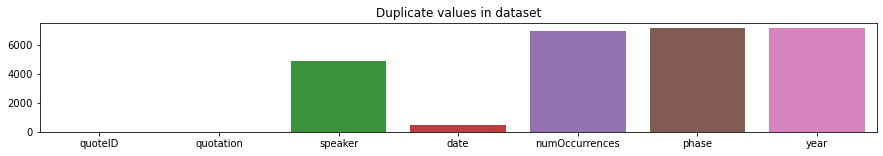

In [10]:
print('\033[0m','Duplicate values of ',len(df_step2),' total elements \n')

c=list(df_step2.columns)
c.remove('qids')
c.remove('probas')
c.remove('urls')
v = []

for m in c:
    print('\033[0m','Duplicated ',m,': ',df_step2.duplicated([m]).sum(),'')
    v.append(df_step2.duplicated([m]).sum())
fig, axs = plt.subplots(1, 1,figsize=(15,2))
sns.barplot(c,v)
axs.set_title('Duplicate values in dataset')
plt.show()

4) Duplicate values are dropped. In this case no row has a duplicate quotations or quoteIDs

In [11]:
df_step2 = df_step2.dropna(subset=['quotation','quoteID'])

5) Missing values are found in the Quotebank dataset

 Missing values of  7124  total elements 

 Missing  quoteIDs :  0 
 Missing  quotation :  0 
 Missing  speaker :  2439 
 Missing  qids :  2439 
 Missing  numOcurr :  0 
 Missing  probas :  0 


/Users/victorgonzalez/opt/anaconda3/envs/ada/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


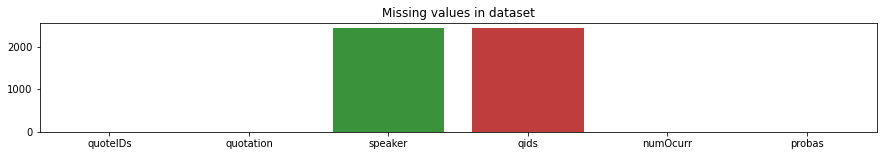

In [12]:
print('\033[0m','Missing values of ',len(df_step2),' total elements \n')

mqid = len(df_step2) -len(df_step2[df_step2["quoteID"].notnull()])
mq = len(df_step2) -len(df_step2[df_step2["quotation"].notna()])
ms = len(df_step2[df_step2["speaker"] == 'None'])
mqiss = len(df_step2[(df_step2.qids.apply(lambda x: len(x)==0))])
mno = len(df_step2[df_step2["numOccurrences"] == 0])
mp = len(df_step2[(df_step2.probas.apply(lambda x: len(x)==0))])

missing = ['quoteIDs','quotation','speaker','qids','numOcurr','probas']
vals = [mqid,mq,ms,mqiss,mno,mp]
for i in range(len(vals)):
    print('\033[0m','Missing ',missing[i],': ',vals[i],'')
    
fig, axs = plt.subplots(1, 1,figsize=(15,2))
sns.barplot(missing,vals)
axs.set_title('Missing values in dataset')
plt.show()

6) Find missing values in speakers_attributes dataset

 Missing values of  9055981  total elements 

 Missing  aliases :  7852579 
 Missing  date_of_birth :  4038648 
 Missing  nationality :  5340129 
 Missing  gender :  1950381 
 Missing  lastrevid :  0 
 Missing  ethnic_group :  8925596 
 Missing  US_congress_bio_ID :  9043107 
 Missing  occupation :  2682897 
 Missing  party :  8656805 
 Missing  academic_degree :  8955986 
 Missing  id :  0 
 Missing  label :  512300 
 Missing  candidacy :  8990539 
 Missing  religion :  8859697 


/Users/victorgonzalez/opt/anaconda3/envs/ada/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


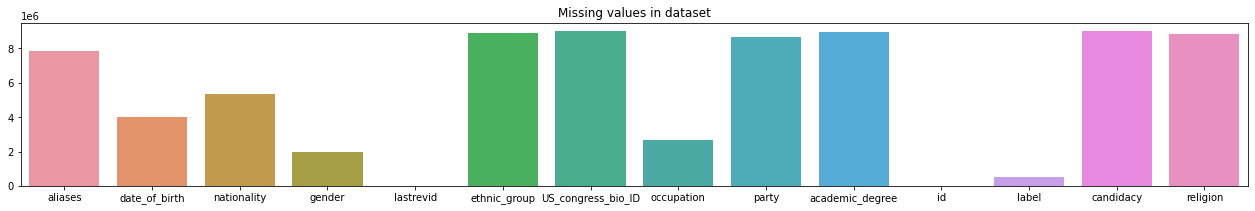

In [13]:
print('\033[0m','Missing values of ',len(df_speaker_attributes),' total elements \n')

vals = []
missing = ['aliases','date_of_birth','nationality','gender','lastrevid','ethnic_group','US_congress_bio_ID','occupation','party','academic_degree','id','label','candidacy','religion']
for m in missing:
    vals.append(len(df_speaker_attributes[df_speaker_attributes[m].isnull()]))
for i in range(len(vals)):
    print('\033[0m','Missing ',missing[i],': ',vals[i],'')

fig,axs = plt.subplots(1, 1,figsize=(22,3))
sns.barplot(missing,vals)
axs.set_title('Missing values in dataset')
plt.show()

7) Detect incorrect or inconsistent values that indicate uncertainity such as rows with several qids and/or several 
probabilities for the same quotation

 1  qids:  3281 ;  1  probas 0 
 2  qids:  613 ;  2  probas 3438 
 3  qids:  201 ;  3  probas 1917 
 4  qids:  118 ;  4  probas 910 
 5  qids:  86 ;  5  probas 380 
 6  qids:  54 ;  6  probas 208 
 7  qids:  64 ;  7  probas 101 


/Users/victorgonzalez/opt/anaconda3/envs/ada/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/victorgonzalez/opt/anaconda3/envs/ada/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


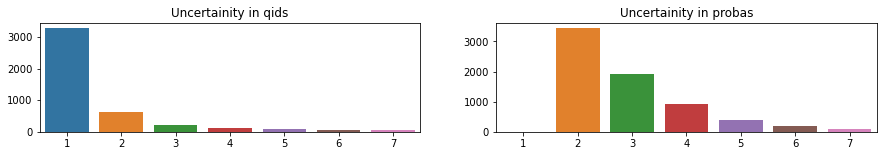

In [14]:
uncertainity = [1,2,3,4,5,6,7]
qids_uncert=[]
p_uncert = []
for d in uncertainity:
    u = len(df_step2[(df_step2.qids.apply(lambda x: len(x)==d))])
    qids_uncert.append(u)
    p = len(df_step2[(df_step2.probas.apply(lambda x: len(x)==d))])
    p_uncert.append(p)
    print('\033[0m',d,' qids: ',u,'; ',d,' probas',p,'')
fig, axs = plt.subplots(1, 2,figsize=(15,2))
sns.barplot(uncertainity,qids_uncert,ax=axs[0])
axs[0].set_title('Uncertainity in qids')
sns.barplot(uncertainity,p_uncert,ax=axs[1])
axs[1].set_title('Uncertainity in probas')
plt.show()

8) For each speaker, only the first qid is chosen

In [15]:
df_step2['unique_qids'] = df_step2.qids.apply(lambda y: [] if len(y)==0 else [y[0]]) # Find unique qids

9) For each quote with a missing speaker, they are associated their second highest value in the 'probas' column if the probability
is greater than a given threshold, in this case 40%

In [16]:
i = list(df_step2[df_step2.speaker=='None'].index) # First find the empty speakers
empty = df_step2.iloc[i]
indexes = [x for x in empty.index if float(empty.loc[x,'probas'][1][1])>0.4] # Where prob > X%
subs = [x[1][0] for x in df_step2.loc[indexes,'probas']] # get the second speaker after 'None'
b = zip(indexes,subs)
dn = pd.DataFrame(b)
xn = dn.set_index(0)
df_step2.loc[indexes,'speaker']= xn.loc[indexes,1] # Substitute the empty speaker for the second option
df_step2 = df_step2[df_step2.speaker!='None'] # Drop those that still are not filled

10) Taking a look at the speakers_attributes database, the empty aliases are filled with the 'label' value, if this field is also empty, that row is dropped

In [17]:
inull = df_speaker_attributes[df_speaker_attributes.aliases.isnull()].index
df_speaker_attributes.loc[inull,'aliases'] = df_speaker_attributes.loc[inull,'label']
df_speaker_attributes = df_speaker_attributes.dropna(subset=['aliases'])

11) For those newly associated speakers, their qid is found in the speakers_attributes table

In [18]:
# Find the indexes where the unique_qids are not filled
names_wo_id = list(df_step2[df_step2.unique_qids.apply(lambda x: len(x) ==0)]['speaker'])
names_wo_id_df = pd.DataFrame(names_wo_id).drop_duplicates()
names_wo_id = list(names_wo_id_df[0])

kv = []
for query in names_wo_id:
    idss=list(df_speaker_attributes[df_speaker_attributes.aliases.apply(lambda y: query in y)].id)
    theid = [idss[0]] if len(idss)>0 else None
    kv.append({'name':query,'qid':theid})

# Auxiliar dataframe with missing speakers and their qids
auxi = pd.DataFrame(kv)
auxi = auxi.dropna(subset=['qid'])
auxi = auxi.set_index('name')
keepindex = df_step2.index # store the index for later
df_step2 = df_step2.set_index('speaker') # change the index to the 'speakers'

# Speakers in quotebank are associated with their qid from speakers_attributes
df_step2.loc[auxi.index,'unique_qids'] = auxi.loc[auxi.index,'qid']
df_step2['speaker'] = df_step2.index # rescue the speakers' column
df_step2 = df_step2.set_index(keepindex) # rescue the previous index

12) There are some speakers that do not appear in the speakers_attributes aliases, therefore no qid is found, and those rows are dropped

In [19]:
# Rename 'NaN' the unique qids which are not filled so then its easier to drop them
df_step2.unique_qids = df_step2.unique_qids.apply(lambda y: np.nan if len(y)==0 else y)
df_step2=df_step2.dropna(0,subset=['unique_qids'])
df_step2['qids'] = df_step2['unique_qids']

# Reorder the columns because speaker was moved before when the index change
df_step2 = df_step2[["quoteID", "quotation", "speaker", "qids", "date", "numOccurrences", "probas", "urls", "phase", "unique_qids", "year"]]
df_step2 = df_step2.drop('unique_qids', axis=1)
df_step2 = df_step2.dropna(subset=['qids'])

/var/folders/cz/drxl2w614qg049wmqrzy06ww0000gn/T/ipykernel_62073/3671923134.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df_step2=df_step2.dropna(0,subset=['unique_qids'])


13) Finally, the database Quotebank is converted into a json in order to assign to it the information present in the Wikidata dumps

In [20]:
df_step2.to_json(path_or_buf='./data/df_step2.json.bz2', orient='records', compression='bz2', lines=True)

---

## 3.3: Expand with Wikidata dumps, deep cleaning & exploration
- Merge Quotebank with Wikidata dumps
- NLP cleaning
    - Remove capital letters, punctuations, emojis, links
    - Lemmatization
- Extracting summary statistics, distributions and correlations
- First model approximation of linear regression
- Justify feasibility of data

The third and final step involves matching each quote with attributes of its speaker. As mentioned above, this is done by looking into Wikidata subset datasource and grabbing attributes assigned to most likely speaker's Wikidata QID. Because some fields may be empty (due to missing data), we make sure that this case is handled correctly.

**Inputs:**
- compressed JSON file with quotes mentioning Brexit and with a known speaker from Quotebank from given year, e.g., `quotes-{year}-step2.json.bz2`

- Wikidata subset with data regarding speakers from Quotebank, stored as a .parquet file, i.e. `speaker_attributes.parquet`

- Wikidata subset with labels and descriptions of all references mentioned in .parquet Wikidata subset, i.e. `wikidata_labels_descriptions_quotebank.csv.bz2`

**Output:** Compressed JSON file with quotes mentioning Brexit and with a known speaker from Quotebank from given year, alongside attributes for speaker of each quote, e.g., `quotes-{year}-step3.json.bz2`

**NOTE:** Wikidata `.parquet` file is stored in memory, which could take ~6 GB of your RAM - please consider using Google Colab, which by default provides 12 GB of RAM.

1) Merge Wikidata dumps with improved Quotation dataframe and load dataframe from json. We comment this cell as the output files are already generated and can be found in the /data directory. 

In [21]:
# # Step 3: merge data from Quotebank and Wikidata
# # NOTE: Wikidata parquet requires ~7 GB of RAM available - please use Colab for this step
# wd_df = pd.read_parquet('./data/speaker_attributes.parquet')
# wd_df.set_index('id', inplace=True)

# wd_desc_df = pd.read_csv('./data/wikidata_labels_descriptions_quotebank.csv.bz2', compression='bz2', index_col='QID')

# path_to_file = f'./data/df_step2.json.bz2'
# path_to_out = f'./data/df_step3.json.bz2'
# index_of_wd_df = set(wd_df.index)
# with bz2.open(path_to_file, 'rb') as s_file:
#     with bz2.open(path_to_out, 'wb') as d_file:
#         for instance in s_file:
#             instance = json.loads(instance) # loading a sample
#             qid = list(index_of_wd_df.intersection(set(instance['qids'])))
#             if(len(qid) == 0):
#                 # Overall, two quotes get ignored due to no match in Wikidata
#                 d_file.write((json.dumps(instance)+'\n').encode('utf-8')) 
#                 continue
#             if (wd_df['gender'][qid][0] is not None):
#               instance['gender'] = wd_desc_df['Label'][wd_df['gender'][qid][0]].tolist()
#             else:
#               instance['gender'] = []
#             if (wd_df['date_of_birth'][qid][0] is not None):
#               instance['date_of_birth'] = wd_df['date_of_birth'][qid][0].tolist()
#             else:
#               instance['date_of_birth'] = []
#             if (wd_df['nationality'][qid][0] is not None):
#               instance['nationality'] = wd_desc_df['Label'][wd_df['nationality'][qid][0]].tolist()
#             else:
#               instance['nationality'] = []
#             if (wd_df['occupation'][qid][0] is not None):
#               instance['occupation'] = wd_desc_df['Label'][wd_df['occupation'][qid][0]].tolist()
#             else:
#               instance['occupation'] = []
#             if (wd_df['party'][qid][0] is not None):
#               instance['party'] = wd_desc_df['Label'][wd_df['party'][qid][0]].tolist()
#             else:
#               instance['party'] = []
#             if (wd_df['academic_degree'][qid][0] is not None):
#               instance['academic_degree'] = wd_desc_df['Label'][wd_df['academic_degree'][qid][0]].tolist()
#             else:
#               instance['academic_degree'] = []
#             if (wd_df['candidacy'][qid][0] is not None):
#               instance['candidacy'] = wd_desc_df['Label'][wd_df['candidacy'][qid][0]].tolist()
#             else:
#               instance['candidacy'] = []
#             if (wd_df['religion'][qid][0] is not None):
#               instance['religion'] = wd_desc_df['Label'][wd_df['religion'][qid][0]].tolist()
#             else:
#               instance['religion'] = []
#             d_file.write((json.dumps(instance)+'\n').encode('utf-8')) # writing in the new file

df_step3 = pd.read_json('./data/df_step3.json.bz2', compression='bz2', lines=True)
df_quotes = df_step3

2) Remove capital letters, punctuations, emojis, links


In [22]:
def clean_text(text):
    text = text.lower()
    text = re.sub('@', '', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r"[^a-zA-Z ]+", "", text)
    
    #Tokenize the data
    text = nltk.word_tokenize(text)
    #Remove stopwords
    text = [w for w in text if w not in sw]
    return text

df_quotes['quotation'] = df_quotes['quotation'].apply(lambda x: clean_text(x))

3) Lemmatization: the process of grouping together the inflected forms of a word so they can be analyzed as a single item, since they have a similar meaning (walking becomes walk, officers becomes officer, etc.)


In [23]:
lemmatizer = WordNetLemmatizer()
def lem(text):
    text = [lemmatizer.lemmatize(t) for t in text]
    text = [lemmatizer.lemmatize(t, 'v') for t in text]
    return text
df_quotes['quotation'] = df_quotes['quotation'].apply(lambda x: lem(x))
df_quotes=df_quotes.reset_index(drop=True)

4) Find histograms for the 10 most popular items of each category

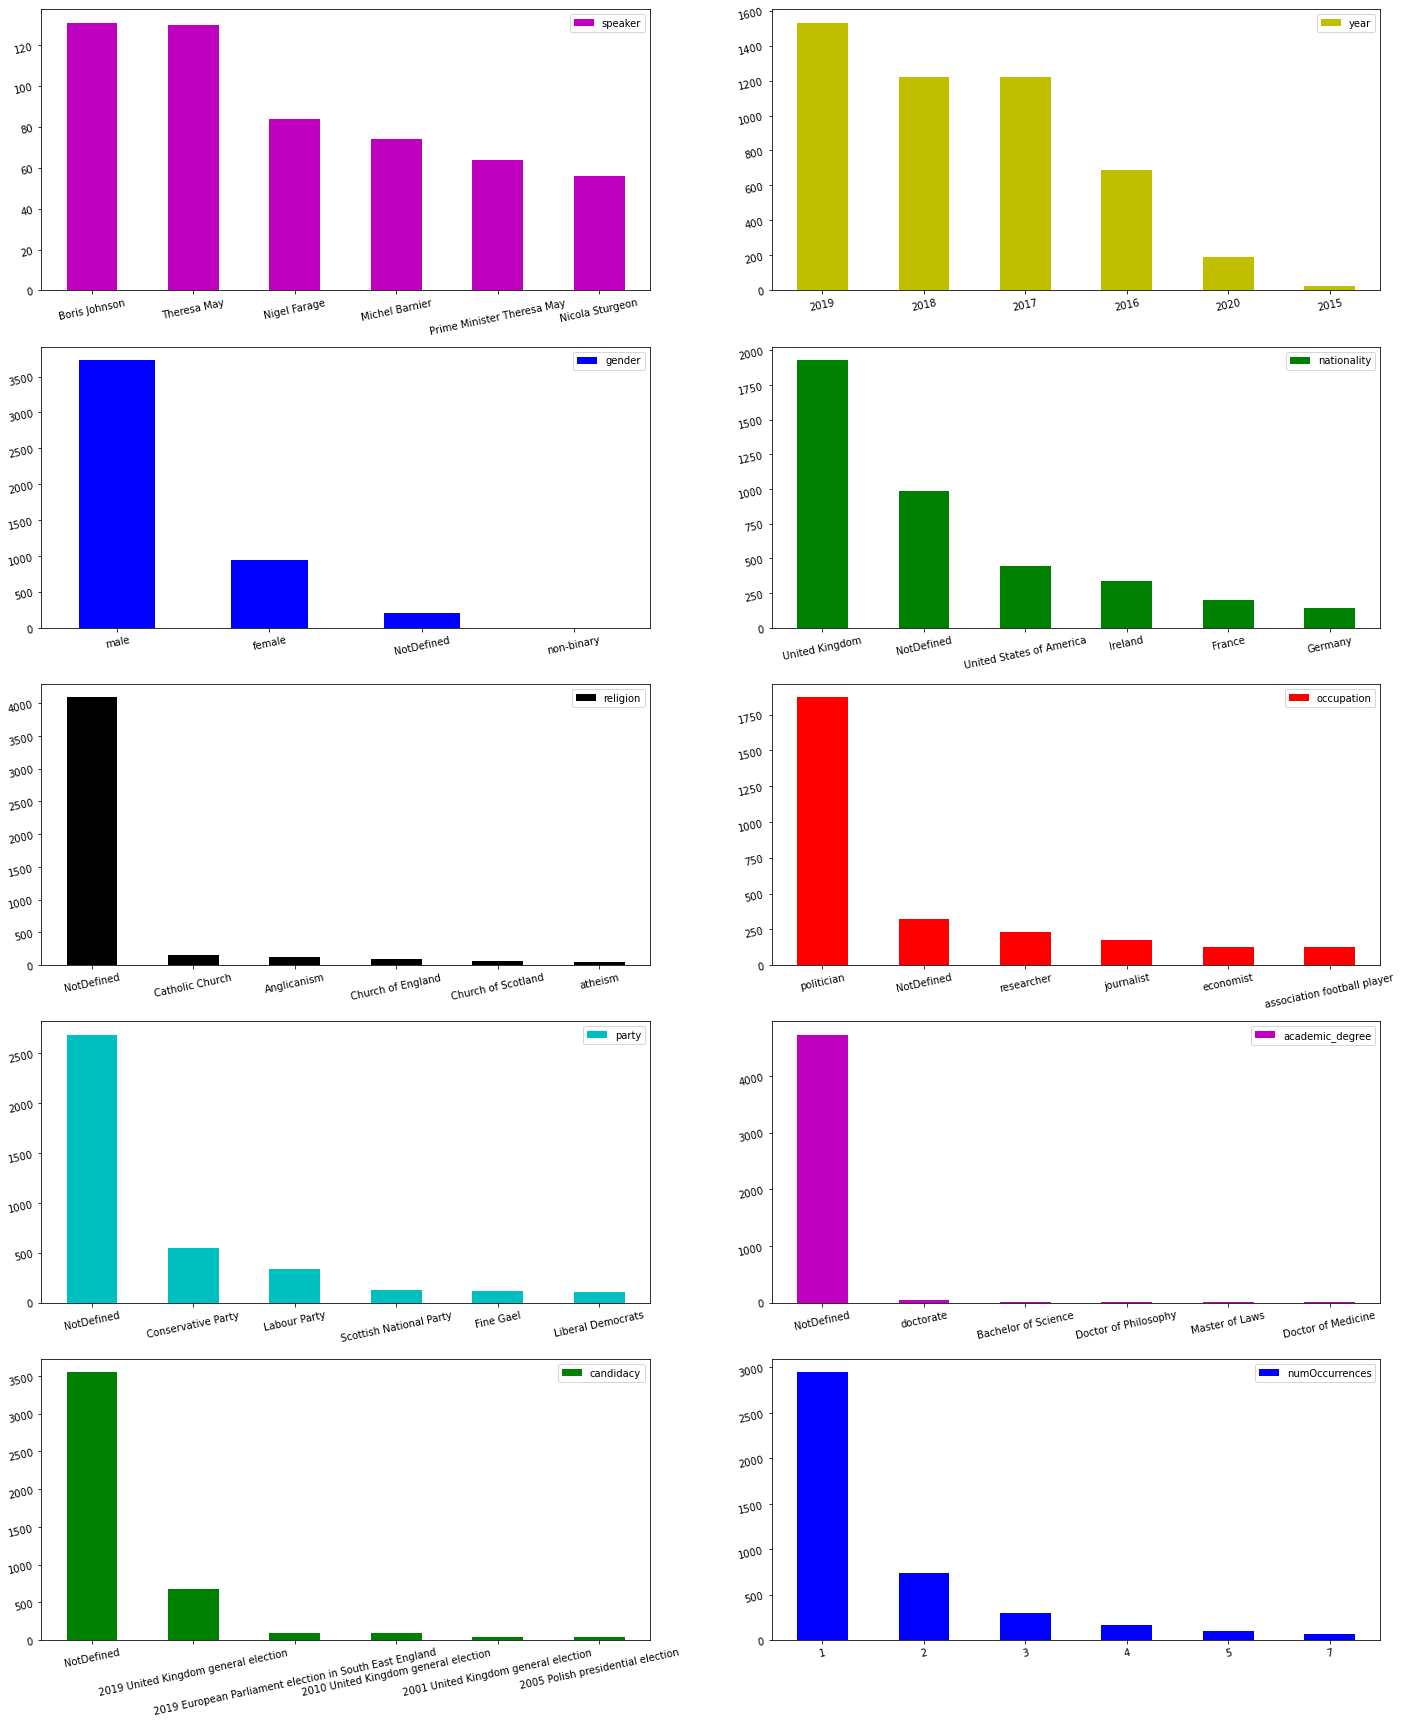

In [24]:
# Create an auxiliar dataframe employing only strings
pd_explore = pd.DataFrame()
pd_explore['speaker']= df_quotes.speaker
pd_explore['year']= df_quotes.year
pd_explore['gender']=[x[0] if (not (isinstance(x,float) and x!='nan') and len(x)>0) else 'NotDefined' for x in df_quotes.gender]
pd_explore['nationality']=[x[0] if (not (isinstance(x,float) and x!='nan') and len(x)>0) else 'NotDefined' for x in df_quotes.nationality]
pd_explore['religion']=[x[0] if (not (isinstance(x,float) and x!='nan') and len(x)>0) else 'NotDefined' for x in df_quotes.religion]
pd_explore['occupation']=[x[0] if (not (isinstance(x,float) and x!='nan') and len(x)>0) else 'NotDefined' for x in df_quotes.occupation]
pd_explore['party']=[x[0] if (not (isinstance(x,float) and x!='nan') and len(x)>0) else 'NotDefined' for x in df_quotes.party]
pd_explore['academic_degree']=[x[0] if (not (isinstance(x,float) and x!='nan') and len(x)>0) else 'NotDefined' for x in df_quotes.academic_degree]
pd_explore['candidacy']=[x[0] if (not (isinstance(x,float) and x!='nan') and len(x)>0) else 'NotDefined' for x in df_quotes.candidacy]
pd_explore['numOccurrences']= df_quotes.numOccurrences

heads = list(pd_explore.columns)
colors = ['m','y','b','g','k','r','c','m','g','b','y']
fig, axs = plt.subplots(int(len(heads)/2), 2,figsize=(24,30))
for n in range(len(heads)):
    f = int(np.floor(n/2))
    c = n%2
    plotting = list(pd_explore[heads[n]])
    letter_counts = Counter(plotting)
    a = letter_counts.most_common(6)
    b=pd.DataFrame(a)
    b=b.set_index(0)
    b.plot(kind='bar',ax = axs[f][c],color=colors[n])
    axs[f][c].legend({heads[n]})
    axs[f][c].set_xlabel("")
    axs[f][c].tick_params(labelrotation=12)
plt.show()

5) Drop the NotDefined data

In [25]:
pd_explore_2  = pd_explore[['speaker','year','gender','nationality','occupation','numOccurrences','party']]
withcorrfull = pd.DataFrame()
heads = list(pd_explore_2.columns)
for head in heads:
    withcorrfull[head] = [x  if x!='NotDefined' else None for x in pd_explore_2[head]]
notna_df = withcorrfull.dropna()

6) Find correlations between columns

In [26]:
cat_df = pd.DataFrame()
for head in heads:
    cat_df[head]=notna_df[head].astype('category').cat.codes
print('There are: ',len(cat_df),' values left')
cat_df.corr()


There are:  2166  values left


,speaker,year,gender,nationality,occupation,numOccurrences,party
speaker,1.000000,-0.027159,-0.020161,0.010072,-0.040578,0.043586,0.055619
year,-0.027159,1.000000,-0.036993,0.007976,0.062761,0.011222,-0.053193
gender,-0.020161,-0.036993,1.000000,-0.117777,-0.102032,-0.001432,-0.047456
nationality,0.010072,0.007976,-0.117777,1.000000,0.002532,-0.006005,-0.176732
occupation,-0.040578,0.062761,-0.102032,0.002532,1.000000,0.023854,0.007937
numOccurrences,0.043586,0.011222,-0.001432,-0.006005,0.023854,1.000000,-0.011913
party,0.055619,-0.053193,-0.047456,-0.176732,0.007937,-0.011913,1.000000


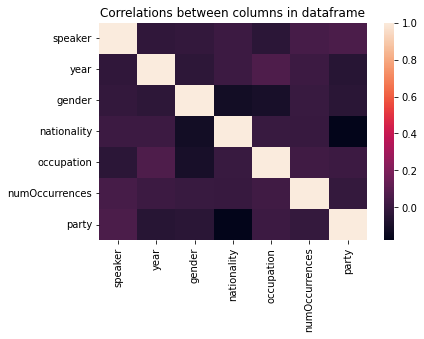

In [27]:
correlations=cat_df.corr()
sns.heatmap(correlations)
plt.title('Correlations between columns in dataframe')
plt.show()

7) First approximation of a model with linear regression

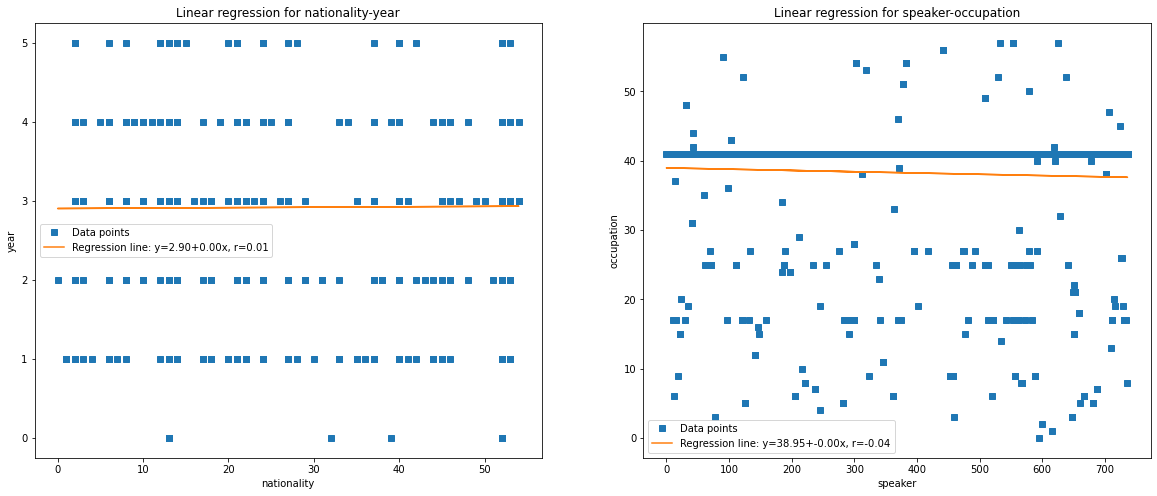

In [28]:
import scipy
fig, ax = plt.subplots(1,2, figsize=(20,8))

x = list(cat_df['nationality'])
y = list(cat_df['year'])

slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
line

ax[0].plot(x, y, linewidth=0, marker='s', label='Data points')
mm = [slope*float(i) for i in x]
ax[0].plot(x, intercept + mm, label=line)
ax[0].set_xlabel('nationality')
ax[0].set_ylabel('year')
ax[0].set_title('Linear regression for nationality-year')
ax[0].legend(facecolor='white')


x = list(cat_df['speaker'])
y = list(cat_df['occupation'])

slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
line

ax[1].plot(x, y, linewidth=0, marker='s', label='Data points')
mm = [slope*float(i) for i in x]
ax[1].plot(x, intercept + mm, label=line)
ax[1].set_xlabel('speaker')
ax[1].set_ylabel('occupation')
ax[1].set_title('Linear regression for speaker-occupation')
ax[1].legend(facecolor='white')


plt.show()

*Linear regression is not very useful, maybe find a model for categorization.*

8) Justify feasibility given the data
- Format is appropriate for analysis
- Enough quotes
- Quotes addressing the issue
- Different speakers involved
- Uniformity of speakers (not all from the same speaker)
- Uniformity of years quotes (not all from the same year)
- Long and short sentences
- Not many missing quotes
- Not many missing speakers
- No correlations between columns

## 3.4. Exploring and visualization

- Q1: Which percentage of the speakers supported or was against Brexit?
- Q2: What arguments did the members of each category use to support their beliefs? 
- Q3: Who were the main supporters of each of the categories? Analyze them according to age, gender, occupation, ...
- Q4: How did the opinion towards Brexit change during the 5 year span? Did the arguments of each group also change?

#### Q1: Which percentage of the speakers supported or was against Brexit?

To answer this question we are going to use Textblob’s sentiment function. This function allows us to look at:
- the polarity of a quote: by returning a float number that ranges from -1 (the most negative) to 1 (the most positive)
- the subjectivity of a quote: by returning a float number that ranges from 0 (very objective) to 1 (very subjective)

We defined a function get_sentiment(dataframe)that gets the polarity and subjectivity for every quote, and then plotted the distribution of said polarity:

In [29]:
def get_sentiment(dataframe):
    '''
    Create a new column with the sentiment of the quote'
    :param dataframe: pandas.DataFrame
    :return: new dataframe
    '''
    #Get sentiment from comments
    dataframe['quotation_sentiment'] = [str(thing) for thing in dataframe['quotation']]
    polarity = []
    subjectivity = []
    for i in range(len(dataframe)):
        blob = TextBlob(dataframe['quotation_sentiment'].iloc[i])
        for sentence in blob.sentences:
            polarity.append(sentence.sentiment.polarity)
            subjectivity.append(sentence.sentiment.subjectivity)
            
    dataframe['polarity']=polarity
    dataframe['subjectivity']=subjectivity
    return dataframe

Text(0.5, 0, 'Subjectivity score')

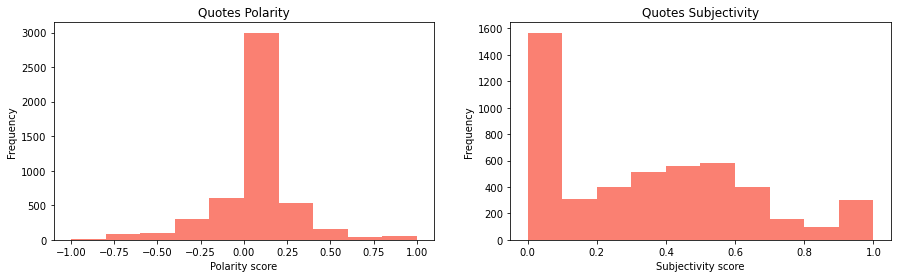

In [30]:
#Get polarity of quotes
df_quotes_with_sentiment = df_quotes
df_quotes_with_sentiment = get_sentiment(df_quotes_with_sentiment)
#Plot
fig, axs = plt.subplots(1, 2,figsize=(15,4))
df_quotes_with_sentiment['polarity'].plot.hist(color='salmon', title='Quotes Polarity', ax=axs[0])
df_quotes_with_sentiment['subjectivity'].plot.hist(color='salmon', title='Quotes Subjectivity', ax=axs[1])
axs[0].set_xlabel('Polarity score')
axs[1].set_xlabel('Subjectivity score')

In [31]:
df_quotes_with_sentiment['polarity'].describe()

count    4874.000000
mean        0.040556
std         0.234116
min        -1.000000
25%         0.000000
50%         0.000000
75%         0.133333
max         1.000000
Name: polarity, dtype: float64

In [33]:
polarized_comments = len(df_quotes_with_sentiment.loc[(df_quotes_with_sentiment['polarity'] < -0.5)|(df_quotes_with_sentiment['polarity'] > 0.5)])
f'Number of extremely polarized comments: {polarized_comments}'

'Number of extremely polarized comments: 234'

---
We use polarity score to classifying positive and negative sentiments in the different quotes. The conclusions we obtain are:
- The vast majority of quotes are what could be considered as rather neutral, with the mean quote having a polarity of 0.040556.
- About 75% of the quotes have a polarity of less than 0.133333, meaning there are very few polarized quotes.
- In fact, only 234 of the 4874 quotes are considered to be very polarized (more than 0.5 or less than -0.5).

---

If we do a deeper analysis , we can classify the speakers based on the polarity of their quotes. This will alow us to identify the opinion speakers have towards Brexit, and the percentages of supporter or detractors it has.

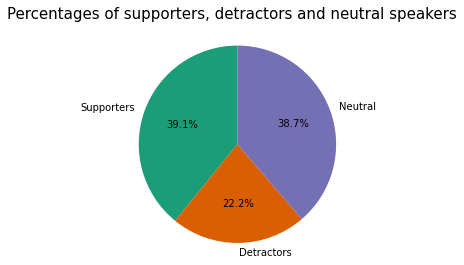

In [34]:
# Classify supporters, detractors and neutral quotes based on the polarity obtained
supporters = df_quotes_with_sentiment.loc[df_quotes_with_sentiment['polarity'] > 0]
supporters_percentage = len(supporters.index)/len(df_quotes_with_sentiment.index)
detractors = df_quotes_with_sentiment.loc[df_quotes_with_sentiment['polarity'] < 0]
detractors_percentage = len(detractors.index)/len(df_quotes_with_sentiment.index)
neutral = df_quotes_with_sentiment.loc[df_quotes_with_sentiment['polarity'] == 0]
neutral_percentage = len(neutral.index)/len(df_quotes_with_sentiment.index)

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Supporters', 'Detractors', 'Neutral'
colors = ['#1b9e77', '#d95f02', '#7570b3']
sizes = [supporters_percentage, detractors_percentage, neutral_percentage]
# explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.suptitle('Percentages of supporters, detractors and neutral speakers',fontsize=15)
plt.show()

As a last step, we can focus on the speakers whose nationality is British, so we can make a smarter approach of the problem.

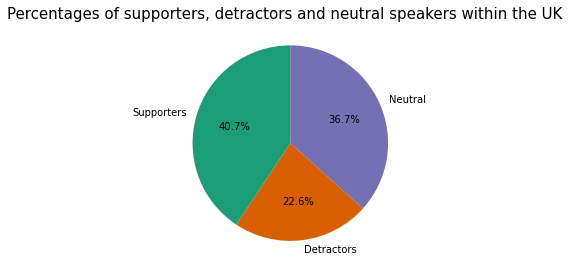

In [35]:
# Classify supporters, detractors and neutral quotes based on the polarity obtained only for British speakers. 
supporters_uk = supporters[supporters['nationality'].apply(lambda x: 'United Kingdom' in str(x))]
detractors_uk = detractors[detractors['nationality'].apply(lambda x: 'United Kingdom' in str(x))]
neutral_uk = neutral[neutral['nationality'].apply(lambda x: x == ['United Kingdom'])]
total = len(supporters_uk.index) + len(detractors_uk.index) +  len(neutral_uk.index)
supporters_uk_percentage = len(supporters_uk.index)/total
detractors_uk_percentage = len(detractors_uk.index)/total
neutral_uk_percentage = len(neutral_uk.index)/total

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Supporters', 'Detractors', 'Neutral'
colors = ['#1b9e77', '#d95f02', '#7570b3']
sizes = [supporters_uk_percentage, detractors_uk_percentage, neutral_uk_percentage]
# explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.suptitle('Percentages of supporters, detractors and neutral speakers within the UK',fontsize=15)
plt.show()

If we analyze the two pie charts, we can see that the results are quite close to reality. The percentage of detractors (22.6%) is almost half that of the supporters (40.7%), while there is also a vast majority of neutral people (36.7%).

However, if we look at the percentages within the UK, the results differ a bit from what we expected.

It can be seen that the percentages are very similar to the previous ones, with a small increase in supporters and detractors. We consider that this results are not so close to reality, as the atmosphere should be more polarized within the country.

#### Q2: What arguments did the members of each category use to support their beliefs? 


To extract the most used arguments by the members of each category we are going to begin by looking at the word frequency of each group, i.e. what words are repeated most often in the quotes of each speakers. To achieve this we are going to use the FreqDist function from nltk.

This function gives us lists with the most frequent samples, bigrams and trigrams within the quotes. To clarify:

- a bigram is pair of words that are next to each other in a quote
- a trigram is trio of words that are next to each other in a quote

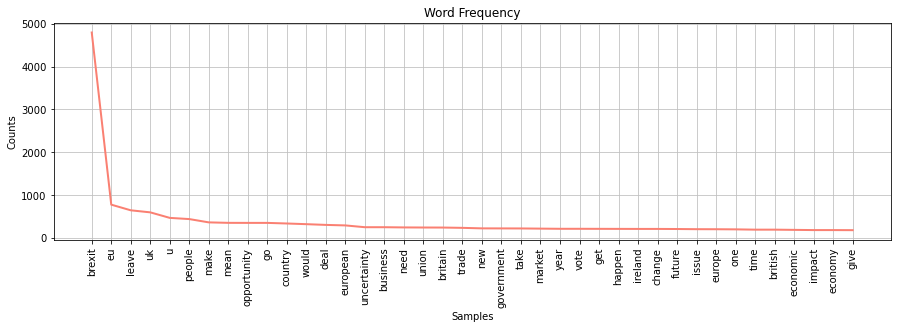

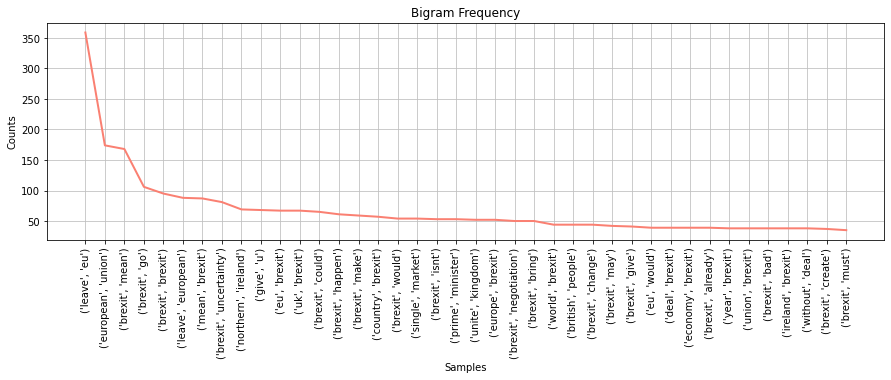

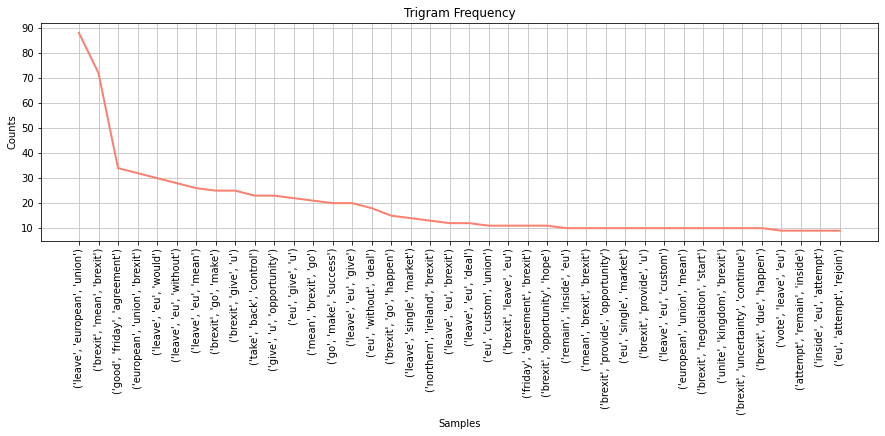

<AxesSubplot:title={'center':'Trigram Frequency'}, xlabel='Samples', ylabel='Counts'>

In [36]:
#From lists of quotes to a single list containing all words      
all_words=[]        
for i in range(len(df_quotes)):
    all_words = all_words + df_quotes['quotation'].iloc[i]

#Get word frequency with ntlk
words_1 = nltk.FreqDist(all_words)
plt.figure(figsize=(15,4))

words_1.plot(40, color='salmon', title='Word Frequency')
#Bigrams
bigrm = list(nltk.bigrams(all_words))
words_2 = nltk.FreqDist(bigrm)
plt.figure(figsize=(15,4))

words_2.plot(40, color='salmon', title='Bigram Frequency')
#Trigrams
trigrm = list(nltk.trigrams(all_words))
words_3 = nltk.FreqDist(trigrm)
plt.figure(figsize=(15,4))

words_3.plot(40, color='salmon', title='Trigram Frequency')

---
To no one's surprise, 'Brexit' is the most repeated word with 4797 appearances, followed by 'eu' with 775 and 'leave' with 643.

If we analyze the bigrams, "leave eu" came up the most with 359 appearances, followed by "european union" with 174 and "brexit mean" with 168. It is necessary to highlight two bigrams that caught our attention: "brexit uncertainty" and "northern ireland".

Related to the trigrams, "leave european union" appears the most a total of 88 times, followed by "breacit mean brexit" with 72 appearances and "good friday agreement" with 34.

The previous analysis does not give us much idea about how people abput Brexit overall.

---

To do an in-depth analysis, we are going to split the words between supporters and detractors, and try to extract conclussions from the arguments followed by each of the different groups.

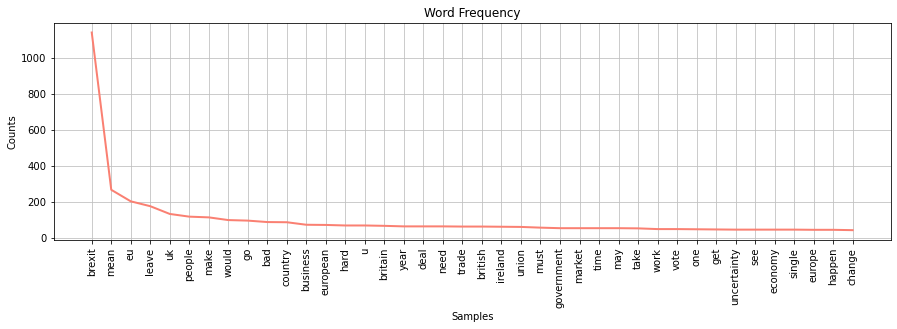

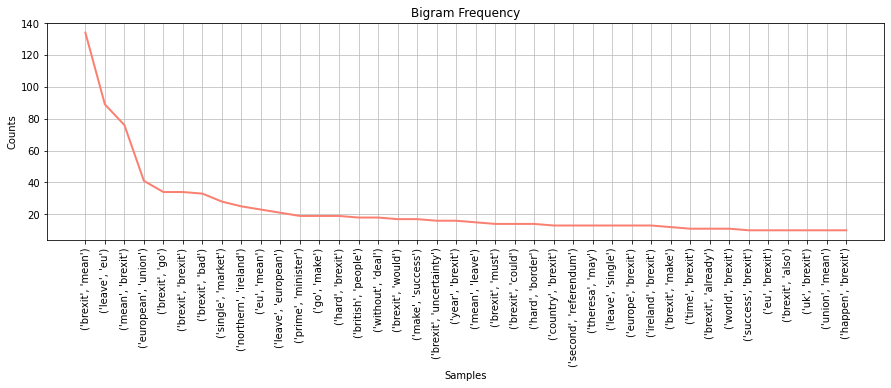

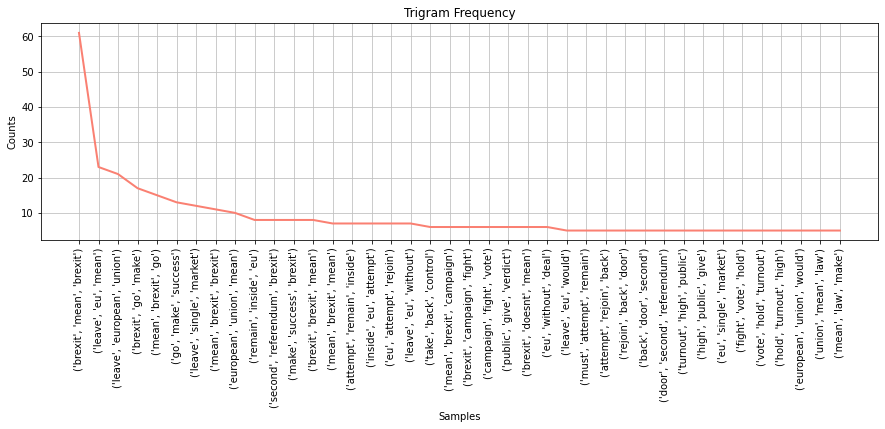

<AxesSubplot:title={'center':'Trigram Frequency'}, xlabel='Samples', ylabel='Counts'>

In [37]:
#From lists of detractors quotes to a single list containing all detractors words      
detractors_words=[]        
for i in range(len(detractors)):
    detractors_words = detractors_words + detractors['quotation'].iloc[i]

#Get word frequency        
words_1_detractors = nltk.FreqDist(detractors_words)
plt.figure(figsize=(15,4))

words_1_detractors.plot(40, color='salmon', title='Word Frequency')
#Bigrams
bigrm_detractors = list(nltk.bigrams(detractors_words))
words_2_detractors = nltk.FreqDist(bigrm_detractors)
plt.figure(figsize=(15,4))

words_2_detractors.plot(40, color='salmon', title='Bigram Frequency')
#Trigrams
trigrm_detractors = list(nltk.trigrams(detractors_words))
words_3_detractors = nltk.FreqDist(trigrm_detractors)
plt.figure(figsize=(15,4))

words_3_detractors.plot(40, color='salmon', title='Trigram Frequency')

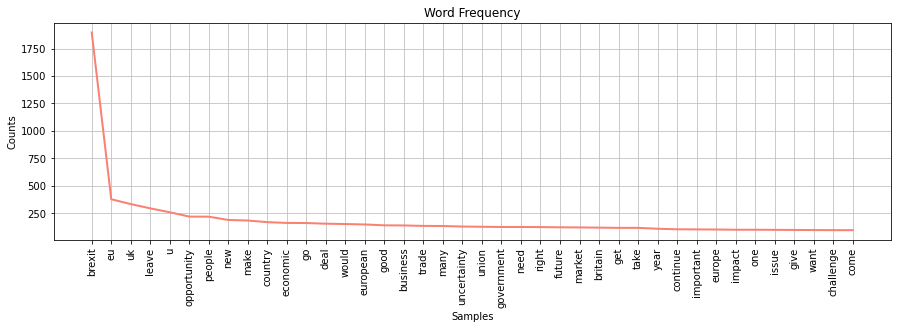

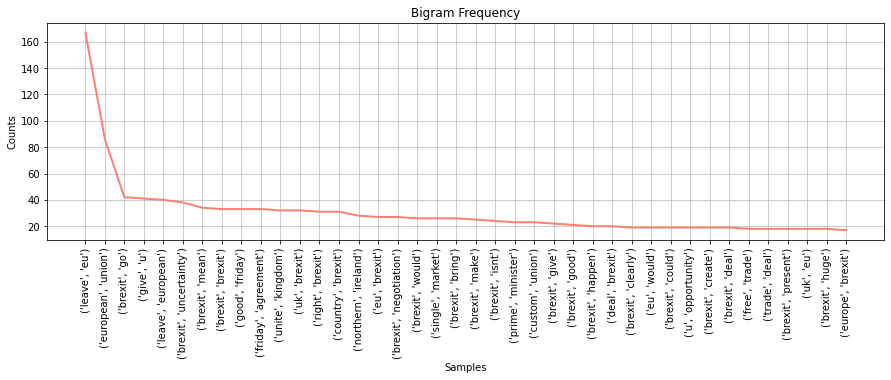

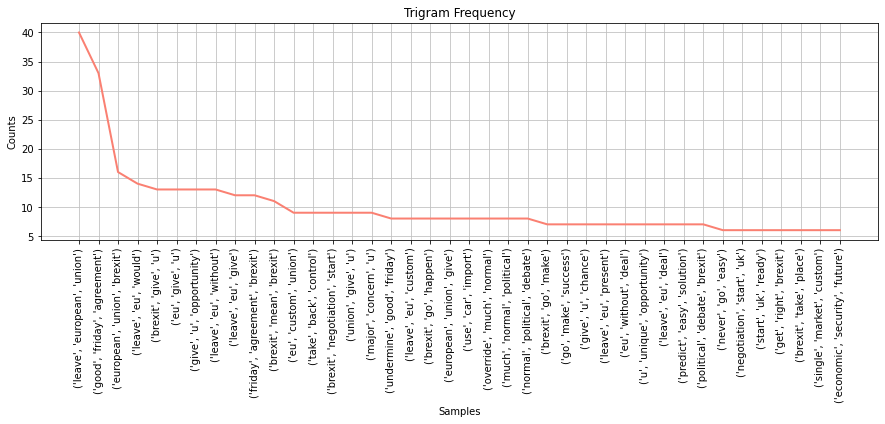

<AxesSubplot:title={'center':'Trigram Frequency'}, xlabel='Samples', ylabel='Counts'>

In [38]:
#From lists of supporters quotes to a single list containing all supporters words      
supporters_words=[]        
for i in range(len(supporters)):
    supporters_words = supporters_words + supporters['quotation'].iloc[i]

#Get word frequency        
words_1_supporters = nltk.FreqDist(supporters_words)
plt.figure(figsize=(15,4))
words_1_supporters.plot(40, color='salmon', title='Word Frequency')
#Bigrams
bigrm_supporters = list(nltk.bigrams(supporters_words))
words_2_supporters = nltk.FreqDist(bigrm_supporters)
plt.figure(figsize=(15,4))
words_2_supporters.plot(40, color='salmon', title='Bigram Frequency')
#Trigrams
trigrm_supporters = list(nltk.trigrams(supporters_words))
words_3_supporters = nltk.FreqDist(trigrm_supporters)
plt.figure(figsize=(15,4))
words_3_supporters.plot(40, color='salmon', title='Trigram Frequency')

Once we have extracted all the words frecuency, we can see that the most repeated words and trigrams continue to be words or constructions related to the words "brexit", "european union", etc.

So in order to extract a more precise conclusion, we are going to compare both dictionaries, in order to obtain the words that differ in both of them.

In [39]:
# Comparing two dictionaries and checking how many (key, value) pairs are equal. Source: stack overflow. 
def dict_compare(d1, d2):
    '''
    Compare Create a new column with the sentiment of the quote'
    :param d1: dictionary 1
    :param d2: dictionary 2
    :return: d1_difference. List of keys present in d1 but not in d2.
    :return: d2_difference. List of keys pairs present in d2 but not in d1.
    :return: same. List of keys pairs present in both dictionaries.
    '''
    d1_keys = set(d1.keys())
    d2_keys = set(d2.keys())
    shared_keys = d1_keys.intersection(d2_keys)
    d1_difference = list(d1_keys - d2_keys)
    d2_difference = list(d2_keys - d1_keys)
    same = set(o for o in shared_keys if d1[o] == d2[o])
    return d1_difference, d2_difference, same

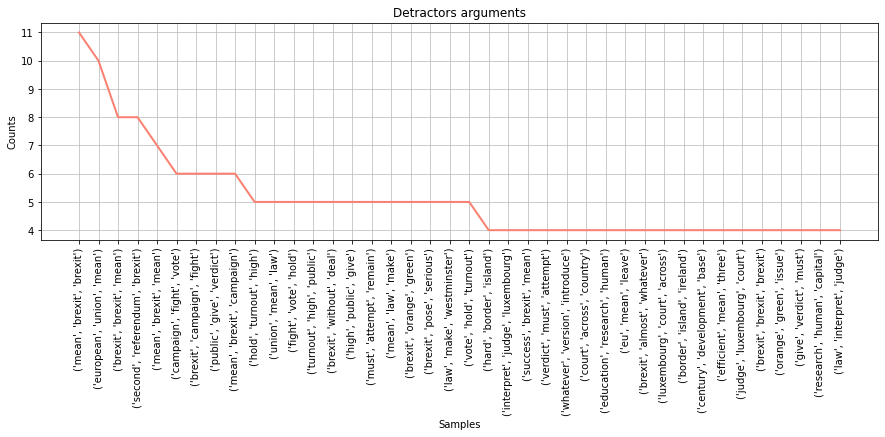

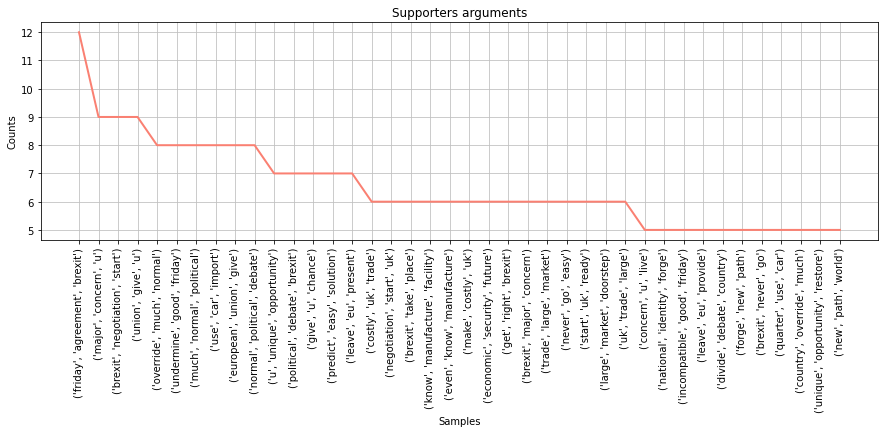

<AxesSubplot:title={'center':'Supporters arguments'}, xlabel='Samples', ylabel='Counts'>

In [40]:
# Compare supporters and detractors dictionaries and getting different keys. 
words_2_detractors_different_keys, words_2_supporters_different_keys, words_2_same_keys = dict_compare(words_2_detractors, words_2_supporters)
words_3_detractors_different_keys, words_3_supporters_different_keys, words_3_same_keys = dict_compare(words_3_detractors, words_3_supporters)

#Filter previous dictionaries to generate a new dictionary that contains the previous keys identified. Source: stack overflow
words_3_detractors_differences = { words_3_detractors_different_keys: words_3_detractors[words_3_detractors_different_keys] for words_3_detractors_different_keys in words_3_detractors_different_keys }
words_3_detractors_differences = nltk.FreqDist(words_3_detractors_differences)
words_3_supporters_differences = { words_3_supporters_different_keys: words_3_supporters[words_3_supporters_different_keys] for words_3_supporters_different_keys in words_3_supporters_different_keys }
words_3_supporters_differences = nltk.FreqDist(words_3_supporters_differences)

#Plot
plt.figure(figsize=(15,4))
words_3_detractors_differences.plot(40, color='salmon', title='Detractors arguments')
plt.figure(figsize=(15,4))
words_3_supporters_differences.plot(40, color='salmon', title='Supporters arguments')

---
After analyzing the different trigrams, we can highlight some of the quotes that sum up the thoughts of each group:

The detractors think that "brexit threatens to destroy" things as we know them, showing their concern about the problem. Also, they state that getting out of the EU would leave UK as an "island with hard border" problems. Finally, one of their main concerns is the occurence of a "brexit without a deal" that would harm the long-term interests of the UK.

On the other side, suporters state that brexit is a "great moment in history" that will give UK an "economic security for the future". For them, this movement is a "large market doorstep" that would allow them to "forge a new path".

So in the end, we can state we managed to get a good idea of the arguments supporters and detractors use to defend their beliefs related to the Brexit event.

---

#### Q3: Who were the main supporters of each of the categories? Analyze them according to age, gender, occupation, ...


#### Q4: How did the opinion towards Brexit change during the 5 year span? Did the arguments of each group also change?

## 3.5. Modeling


## 3.6. Interpreting our data

## 3.7. Storytelling and communication

### Plan for storytelling and communication

In [41]:
# Various choices of communication that we thought about but discarded


In [42]:
# Final good choice for communication. Has to be reasonable and sound.


---

# 4. Conclusions

### 4.1. Summary of the notebook


### 4.2. Results obtained


### 4.3. Problems encountered

---

# 5. Future lines